## 1) Cargo los datos

In [1]:
import pandas as pd
from funpymodeling.exploratory import status

In [2]:
data = pd.read_csv("modulos/data/ohe_customer_dataset.csv", sep=',')

#### Si bien podria analizar todas las columnas, solo analizare algunas de ellas

In [3]:
filter_data = data[["orderState_failed", "orderState_fulfilled", "orderState_pending", "transactionFailed", "fraudulent", "customerIPAddressSimplified_digits_and_letters"]].copy()

## 2) Clustering con K-means

Normalizamos los datos (z-score)

In [4]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(filter_data)
x_data_norm = std_scaler.transform(filter_data)

pd.DataFrame(x_data_norm).describe()

,0,1,2,3,4,5
count,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02
mean,5.702590e-18,4.562072e-17,-2.281036e-17,4.847202e-17,-9.124144e-17,-2.281036e-17
std,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00
min,-2.953981e-01,-1.339299e+00,-2.169305e-01,-6.076436e-01,-2.028993e+00,-3.755338e-01
25%,-2.953981e-01,-1.339299e+00,-2.169305e-01,-6.076436e-01,-7.271779e-01,-3.755338e-01
50%,-2.953981e-01,7.466592e-01,-2.169305e-01,-6.076436e-01,5.746377e-01,-3.755338e-01
75%,-2.953981e-01,7.466592e-01,-2.169305e-01,1.645701e+00,5.746377e-01,-3.755338e-01
max,3.385262e+00,7.466592e-01,4.609772e+00,1.645701e+00,5.746377e-01,2.662876e+00


#### Creacion del modelo

In [5]:
from sklearn.cluster import KMeans

cl_model = KMeans(
    n_clusters = 3,
    init = "k-means++",
    max_iter = 100,
    random_state = 0,
    n_init = 'auto'
)

cl_model.fit(x_data_norm)

KMeans(max_iter=100, n_clusters=3, random_state=0)

In [6]:
pred_cl = cl_model.predict(x_data_norm)

pred_cl

array([0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 1,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2,
       1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

#### ¿Cantidad de clusters?

In [7]:
cl_model

KMeans(max_iter=100, n_clusters=3, random_state=0)

In [8]:
from copy import deepcopy

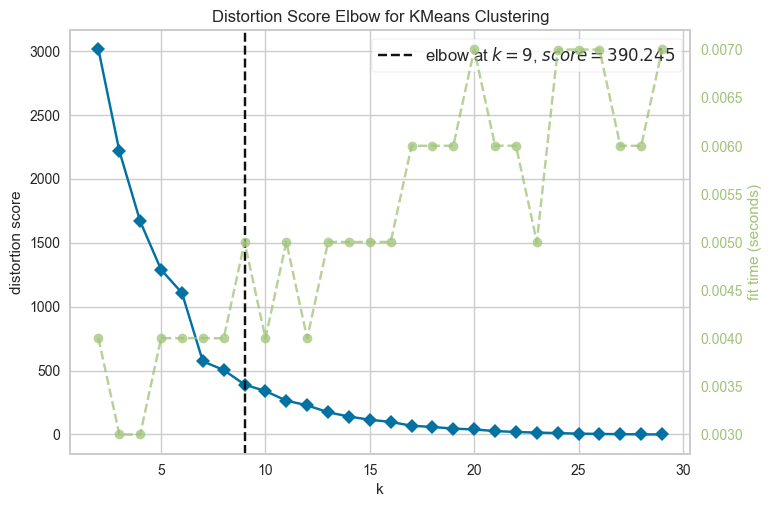

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=100, n_clusters=29, random_state=0),
                 k=(2, 30))

In [9]:
from yellowbrick.cluster.elbow import kelbow_visualizer

cl_model2 = deepcopy(cl_model)

kelbow_visualizer(cl_model2, x_data_norm, k = (2, 30), locate_elbow=True)

#### Grafico de coordenadas

Hago copia de los datos y lo agrego al cluster 

In [10]:
cluster_var = 'cluster'
x_data_cl = filter_data.copy()
x_data_cl[cluster_var] = cl_model.predict(x_data_norm) 

In [11]:
x_data_cl.head()

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,False,False,True,False,0,False,0
1,False,True,False,False,1,False,0
2,False,True,False,False,0,True,2
3,False,True,False,False,0,True,2
4,False,True,False,True,1,False,0


In [12]:
from funpymodeling.model_validation import coord_plot

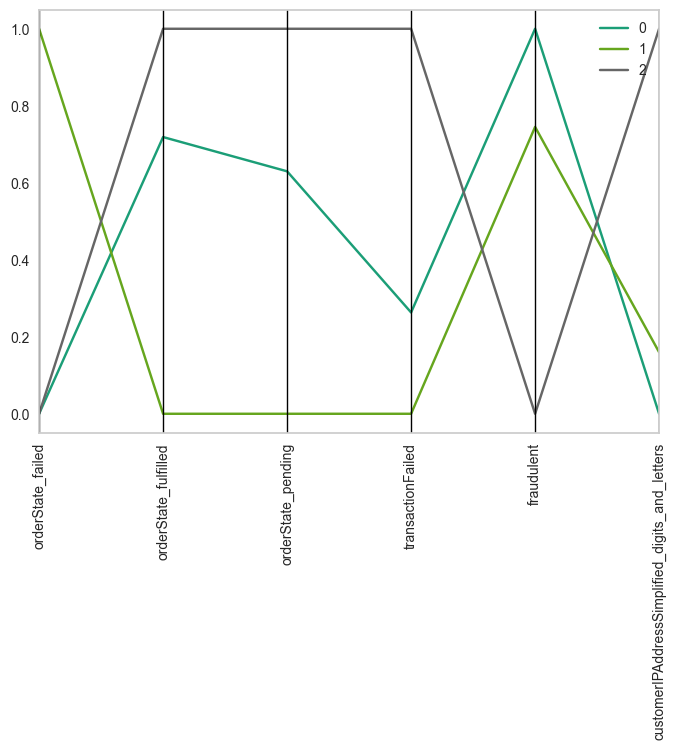

In [13]:
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

* En el cluster 2 se observa que en los casos donde no existe error en el pedido y se llega a cumplir el mismo, la transaccion falla pero no se considera fraude, y el IPAddress del cliente contiene digitos y letras.
* En el cluster 1 se observa que existe un error en el pedido y puede llegar a ser un caso fraudulento, donde la mayoria de IPAddress del cliente no contiene digitos y letras. 
* En el cluster 2 se observa que no existe un error en el pedido, pero no siempre se llega a cumplir y hay veces que queda en estado pendiente. El IPAddress del cliente no contiene digitos y letras, solo letras, y en estos casos es donde siempre se encuentra fraudulenta la acción. 

## Scutter 3D

In [14]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,transactionFailed,0,0.0,455,0.730337,2,bool
1,fraudulent,0,0.0,107,0.171750,3,int64
2,"orderAmount_(9.999, 18.4]",0,0.0,527,0.845907,2,bool
3,"orderAmount_(18.4, 30.0]",0,0.0,527,0.845907,2,bool
4,"orderAmount_(30.0, 39.0]",0,0.0,525,0.842697,2,bool
5,"orderAmount_(39.0, 47.0]",0,0.0,526,0.844302,2,bool
6,"orderAmount_(47.0, 353.0]",0,0.0,532,0.853933,2,bool
7,orderAmount_desconocido,0,0.0,478,0.767255,2,bool
8,orderState_failed,0,0.0,573,0.919743,2,bool
9,orderState_fulfilled,0,0.0,223,0.357945,2,bool


In [15]:
import plotly.express as px 

In [16]:
fig = px.scatter_3d(data, x='orderState_failed', y='customerIPAddressSimplified_digits_and_letters', z = 'transactionFailed', color='fraudulent')
fig.show()

## Clustering con HDBSCAN

In [17]:
import hdbscan

In [18]:
model_hdb = hdbscan.HDBSCAN()
model_hdb.fit(filter_data)

HDBSCAN()

In [19]:
#Nro de cluster
model_hdb.labels_

array([ 0, 13,  2,  2,  7, -1,  7, 13,  5, 13, 13, 12,  2, -1,  5, 13,  6,
       12,  0, 12, 12, -1, 12,  7,  2, 12,  0,  5,  0, -1,  5,  6, 10, 12,
        5,  2, 12,  2,  0,  6, 11, 12,  6, -1,  6,  7, 13, -1,  2, 12, 13,
        5,  2,  6,  2, -1,  2, 13,  2, 12, 13,  2, 11, 12, 10, 11, -1,  6,
       11,  2, 12, -1,  5,  6,  2, 12, -1, 12, -1,  7, 13,  2, 13, 11, 13,
       -1,  0, 12, -1,  0, 11, 12,  5, 13,  2, 12, 10,  7, -1,  7, 12,  2,
       11, 10, 11, 13, 12,  2, 13,  6, 12,  6, 11,  6, -1, 13,  2,  2,  6,
       13, 11, 11,  2,  0, 12,  2, 13,  2, 12, 10,  2,  2,  2, 11, 12, 12,
       13,  5, -1,  2,  6, 13,  0, 12, 13,  6, -1,  5,  5,  5,  5, 11,  6,
       11,  2, 10, -1,  2,  0, 12, -1, -1,  2, 13,  7, 11,  3,  6,  4,  3,
        4,  4,  8,  4,  4,  4,  4,  4,  4,  4,  4,  4,  8,  3,  8,  8,  8,
        4, 14,  8,  4,  8,  3,  4,  4,  8,  8,  8,  4,  8,  4,  4,  8,  8,
        4,  4,  4,  4,  3,  4, 14,  4,  4,  4,  4,  4,  4,  8,  4,  4,  4,
        4, 14,  8,  8,  4

In [20]:
from funpymodeling.exploratory import freq_tbl, todf

freq_tbl(model_hdb.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,4,196,0.314607,0.314607
1,15,105,0.168539,0.483146
2,8,67,0.107544,0.59069
3,9,40,0.064205,0.654896
4,2,30,0.048154,0.70305
5,12,27,0.043339,0.746388
6,3,24,0.038523,0.784912
7,-1,23,0.036918,0.82183
8,13,22,0.035313,0.857143
9,6,16,0.025682,0.882825


*17 clusters* 

In [21]:
model_hdb2 = hdbscan.HDBSCAN(min_cluster_size = 15).fit(filter_data)

In [22]:
freq_tbl(model_hdb2.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,6,196,0.314607,0.314607
1,8,105,0.168539,0.483146
2,-1,94,0.150883,0.634029
3,2,67,0.107544,0.741573
4,3,41,0.065811,0.807384
5,4,30,0.048154,0.855538
6,1,27,0.043339,0.898876
7,5,24,0.038523,0.9374
8,7,23,0.036918,0.974318
9,0,16,0.025682,1.0


#### Analisis del modelo cluster (profiling)

In [23]:
cluster_var = 'cluster'
x_data_cl = filter_data.copy()
x_data_cl[cluster_var] = model_hdb2.labels_

In [24]:
x_data_cl.head()

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,False,False,True,False,0,False,-1
1,False,True,False,False,1,False,5
2,False,True,False,False,0,True,4
3,False,True,False,False,0,True,4
4,False,True,False,True,1,False,-1


Sacamos el cluster de ruido

In [25]:
x_data_cl = x_data_cl[x_data_cl['cluster']!= -1]

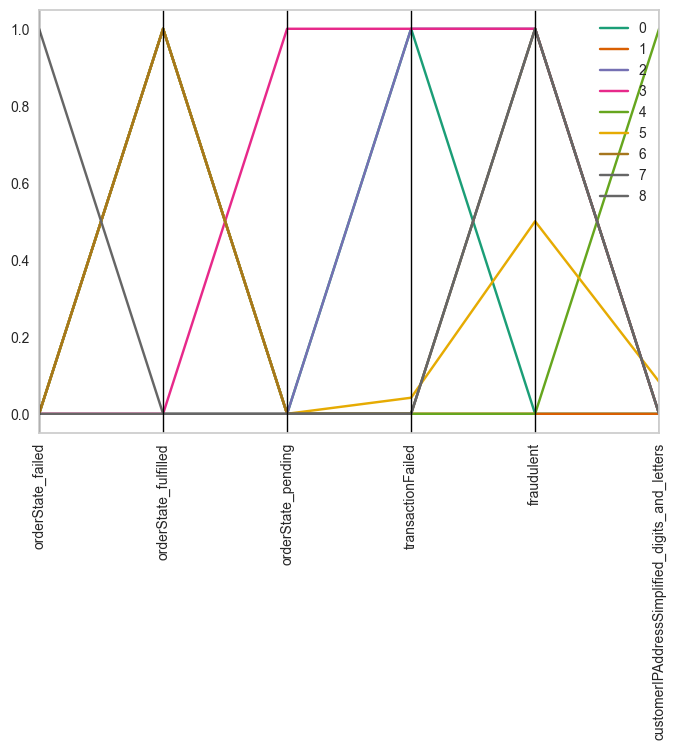

In [26]:
d_orig, d_trasfer = coord_plot(x_data_cl, cluster_var)

* Siempre que no haya un error en la transaccion y la direccion IP del cliente solo contenga letras, la acción es fraudulenta. 
* Siempre que no haya error en la transaccion y la direccion IP del cliente contenga digitos y letras, no existe fraude. 
* Siempre que exista un error en la transacción y el estado del pedido este pendiente, la acción se considera fraudulenta. 

In [27]:
d_orig

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,0.0,1.0,0.00000,1.000000,0.0,0.000000,0
1,0.0,1.0,0.00000,0.000000,0.0,0.000000,1
2,0.0,1.0,0.00000,1.000000,2.0,0.000000,2
3,0.0,0.0,0.02439,1.000000,2.0,0.000000,3
4,0.0,1.0,0.00000,0.000000,0.0,1.000000,4
5,0.0,1.0,0.00000,0.041667,1.0,0.083333,5
6,0.0,1.0,0.00000,0.000000,2.0,0.000000,6
7,1.0,0.0,0.00000,0.000000,2.0,0.000000,7
8,0.0,0.0,0.00000,0.000000,2.0,0.000000,8


In [28]:
d_transf

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,0.0,0.71875,0.629762,0.263176,1.000000,0.00,0
1,1.0,0.00000,0.000000,0.000000,0.745083,0.16,1
2,0.0,1.00000,1.000000,1.000000,0.000000,1.00,2
